<a href="https://colab.research.google.com/github/khuie-alt/Masters/blob/main/Olympics_EDA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olympics EDA FINAL
Kenneth Huie

## About this Data Set

### Summary
120 years of Olympics data, from 1896-2018

**Data Source**

[120 years of Olympic history: athletes and results – Kaggle.com](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

**Description**

From the Kaggle page:

“This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.”

“Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four-year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.”

**Files**

Two CSV files:

- `athlete_events.csv`: 271,116 rows, 15 columns
- `noc_regions.csv`: 230 rows, 3 columns
  


## Data Dictionary

### Fields in `athlete_events.csv`

271,116 records, each representing an event in which the athlete competed. (If an athlete competed in 15 events, the athlete will have 15 entries.)

- ID: Unique number for each athlete
- Name: Athlete’s full name
- Sex: M or F
- Age: Age when competed in this specific Olympic event
- Height: Height in centimeters
- Weight: Weight in kilograms
- Team: The specific team on which the athlete competed. (This is not identical to country or National Olympic Committee Region. An NOC region may have multiple teams.)
- NOC: National Olympic Committee 3-letter code
- Games: Year and season of the Olympic games for this event
- Year: Year as a four-digit integer
- Season: Summer or Winter
- City: Host city
- Sport: A parent category of the Event
- Event: Specific event in which the athlete competed.
- Medal: Gold, Silver, Bronce, or null (for no medal)

Fields in `noc_regions.csv`

230 Records, each representing an National Olympic Committee and its region (aka country)

- NOC:National Olympic Committee three-letter code
- region: Country name
- notes: usually null, but a small number of records have a note about details that might be unclear regarding the NOC and region


# Import Libraries and Set Notebook Defaults

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Set Notebook Defaults
pd.set_option('display.max_columns', None)

# Set Pandas to display numbers without scientific notation, and with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format

In [13]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Customize seaborn plot styles
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)
sns.set_style('ticks')
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

In [15]:
# Set color palettes for plots
# See Matplotlib named color options here: https://matplotlib.org/stable/gallery/color/named_colors.html
blue = 'deepskyblue' # Use 'skyblue' for a lighter blue
orange = 'orange'
cp1 = [blue, orange]

# cp2 Palette - Reversed binary color order when needed for certain plots
cp2 = [orange, blue]

# cp5 Palette - 5 colors for use with categorical data
turquoise = 'mediumaquamarine'
salmon = 'darksalmon'
tan = 'tan'
gray = 'darkgray'
cp5 = [blue, turquoise, salmon, tan, gray]

# cpd Palette - blue-to-orange diverging palette for correlation heatmaps
cpd = sns.diverging_palette(242, 39, s=100, l=65, n=11)

# Set the default palette
sns.set_palette(cp5)

# Read, Review, and Prep Data

## Read and Merge Data Files

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Masters Courses/Descriptive Analytics and Data Integrity/Olympics EDA/Data/athlete_events.csv')

In [17]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [18]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.00,179.00,89.00,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.00,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.00,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.00,185.00,96.00,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.00,185.00,96.00,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [19]:
df.sample(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
67357,34424,Lyudmila Yevgenyevna Fedotova,F,23.00,166.00,56.00,Kazakhstan,KAZ,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Women's Giant Slalom,NaN
71878,36580,William Speed Lane Fox-Pitt,M,27.00,196.00,80.00,Great Britain,GBR,1996 Summer,1996,Summer,Atlanta,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",NaN
202324,101621,Leopoldo Rods Pars,M,21.00,182.00,80.00,Spain,ESP,1960 Summer,1960,Summer,Roma,Swimming,Swimming Men's 100 metres Freestyle,NaN
15687,8453,Gianluca Basile,M,29.00,192.00,94.00,Italy,ITA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Silver
128319,64606,Ryszard Kucjas,M,29.00,160.00,59.00,Poland,POL,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Floor Exercise,NaN
65864,33707,Georg R. Faehlmann,M,32.00,NaN,NaN,Tutti V,EST,1928 Summer,1928,Summer,Amsterdam,Sailing,Sailing Mixed 6 metres,Bronze
27320,14192,Charles Bouvier,M,37.00,NaN,NaN,Switzerland-1,SUI,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Bobsleigh,Bobsleigh Men's Two,NaN
263921,132065,Xu Jiayu,M,20.00,187.00,78.00,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Backstroke,NaN
171650,86250,Marharyta Mykolavna Nikolaieva (Petrova-),F,24.00,159.00,55.00,Soviet Union,URS,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Women's Horse Vault,Gold
35035,18046,Giulio Capitanio,M,27.00,180.00,70.00,Italy,ITA,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN


In [20]:
df.shape

(271116, 15)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [22]:
df.describe()

,ID,Age,Height,Weight,Year
count,"271,116.00","261,642.00","210,945.00","208,241.00","271,116.00"
mean,"68,248.95",25.56,175.34,70.70,"1,978.38"
std,"39,022.29",6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,"1,896.00"
25%,"34,643.00",21.00,168.00,60.00,"1,960.00"
50%,"68,205.00",24.00,175.00,70.00,"1,988.00"
75%,"102,097.25",28.00,183.00,79.00,"2,002.00"
max,"135,571.00",97.00,226.00,214.00,"2,016.00"


## Questions
### Age
Which athletes were in their 90's? Is this data accurate?

### Get description of non-numeric fields

In [23]:
df.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


In [24]:
df.count()

,0
ID,271116
Name,271116
Sex,271116
Age,261642
Height,210945
Weight,208241
Team,271116
NOC,271116
Games,271116
Year,271116


## Merge Files: `athlete_events` with `noc_regions`

In [25]:
# Read the noc_regions.csv file
# store to df_noc

df_noc = pd.read_csv('/content/drive/MyDrive/Masters Courses/Descriptive Analytics and Data Integrity/Olympics EDA/Data/noc_regions.csv')
df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [26]:
df_noc.shape

(230, 3)

In [27]:
df_noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [28]:
# prompt: view the records from df_noc which have non-null values for notes

df_noc[df_noc['notes'].notnull()]


,NOC,region,notes
1,AHO,Curacao,Netherlands Antilles
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
26,BOH,Czech Republic,Bohemia
51,CRT,Greece,Crete
88,HKG,China,Hong Kong
93,IOA,Individual Olympic Athletes,Individual Olympic Athletes
99,ISV,"Virgin Islands, US",Virgin Islands
143,NBO,Malaysia,North Borneo
147,NFL,Canada,Newfoundland


In [29]:
# Merge df with df_noc
df = df.merge(df_noc, how='left', on='NOC')
df.sample(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
68807,35101,Friedrich Fetz,M,24.00,NaN,NaN,Austria,AUT,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Pommelled Horse,NaN,Austria,NaN
209423,105157,Eriel Snchez Len,M,29.00,183.00,94.00,Cuba,CUB,2004 Summer,2004,Summer,Athina,Baseball,Baseball Men's Baseball,Gold,Cuba,NaN
179917,90426,Vctor Danilo Pacheco Bustamante,M,17.00,NaN,NaN,Colombia,COL,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,NaN,Colombia,NaN
197091,98945,Jari Kalevi Rsnen,M,22.00,172.00,65.00,Finland,FIN,1988 Winter,1988,Winter,Calgary,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,Finland,NaN
92415,46811,Akira Hayashi,M,21.00,171.00,72.00,Japan,JPN,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Breaststroke,NaN,Japan,NaN
241902,121162,Segun Moses Toriola,M,33.00,182.00,70.00,Nigeria,NGR,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Men's Team,NaN,Nigeria,NaN
218202,109597,Martin Joseph Sheridan,M,25.00,190.00,88.00,United States,USA,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's Standing Long Jump,Silver,USA,NaN
85438,43312,Steffen Grummt,M,20.00,191.00,80.00,East Germany,GDR,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's Decathlon,NaN,Germany,NaN
127243,64154,Andrey Krivosheyev,M,27.00,178.00,79.00,Russia,RUS,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Russia,NaN
97558,49375,Nancy E. Holland (-Podorigzach),F,21.00,156.00,65.00,Canada,CAN,1964 Winter,1964,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Women's Giant Slalom,NaN,Canada,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [31]:
df.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783,270746,5039
unique,134732,2,1184,230,51,2,42,66,765,3,205,21
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372,18853,2583


In [32]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [33]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29.00,179.00,89.00,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.00,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.00,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.00,185.00,96.00,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.00,185.00,96.00,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


# Cleaning Steps

## Setting Data Types

In [34]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [35]:
df.sample(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
51839,26643,Enrique de Satrstegui Fernndez Barri Vicua,M,23.00,NaN,NaN,Spain,ESP,1920 Summer,1920,Summer,Antwerpen,Tennis,Tennis Men's Singles,NaN,Spain,NaN
242260,121349,Jess A. Toscano Palacios,M,25.00,184.00,81.00,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Rowing,Rowing Men's Coxless Fours,NaN,Mexico,NaN
233047,116901,Geir Sveinsson,M,24.00,193.00,90.00,Iceland,ISL,1988 Summer,1988,Summer,Seoul,Handball,Handball Men's Handball,NaN,Iceland,NaN
17901,9507,Dennis Bekkers,M,27.00,174.00,68.00,Netherlands,NED,2008 Summer,2008,Summer,Beijing,Taekwondo,Taekwondo Men's Featherweight,NaN,Netherlands,NaN
198248,99540,Shayne Leanne Reese,F,21.00,168.00,62.00,Australia,AUS,2004 Summer,2004,Summer,Athina,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,Australia,NaN
187955,94427,Prisca Philip (-Polzine),F,24.00,NaN,NaN,Barbados,BAR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 400 metres,NaN,Barbados,NaN
80420,40817,Ernest Glover,M,21.00,180.00,68.00,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Athletics,"Athletics Men's 10,000 metres",NaN,UK,NaN
58334,29857,Vladimir Petrovich Drachov,M,31.00,170.00,61.00,Russia,RUS,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Men's 20 kilometres,NaN,Russia,NaN
132898,66893,Anna Karin Larsson (-Ahlstrm),F,18.00,170.00,64.00,Sweden,SWE,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN,Sweden,NaN
52982,27210,Ghislain Albert Hector Delaunois,M,28.00,NaN,NaN,Belgium,BEL,1952 Summer,1952,Summer,Helsinki,Fencing,"Fencing Men's epee, Individual",NaN,Belgium,NaN


In [36]:
df.dtypes

,0
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


### Age Data Type
I am changing age to integer because there are no decimals in the age column data.

In [37]:
df.Age = pd.to_numeric(df.Age, errors='coerce').astype('Int64')
df.Age

,Age
0,24
1,23
2,24
3,34
4,21
...,...
271111,29
271112,27
271113,27
271114,30


## Additional Cleaning Steps

### Missing Data

In [38]:
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [39]:
df[df.isna().any(axis=1)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179.00,89.00,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30,185.00,96.00,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


### Fill In Missing Region Data
I decided to use the team column to fill in the missing region values because they should typically be the same.

In [40]:
df['region'] = df.apply(lambda row: row['Team'] if pd.isnull(row['region']) else row['region'], axis=1)
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


### Inconsistent Text & Typos
No inconsistent data found

In [41]:
df.describe()

,ID,Age,Height,Weight,Year
count,"271,116.00","261,642.00","210,945.00","208,241.00","271,116.00"
mean,"68,248.95",25.56,175.34,70.70,"1,978.38"
std,"39,022.29",6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,"1,896.00"
25%,"34,643.00",21.00,168.00,60.00,"1,960.00"
50%,"68,205.00",24.00,175.00,70.00,"1,988.00"
75%,"102,097.25",28.00,183.00,79.00,"2,002.00"
max,"135,571.00",97.00,226.00,214.00,"2,016.00"


## Updated Data Review Process

In [42]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [43]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29,179.00,89.00,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30,185.00,96.00,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34,185.00,96.00,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [44]:
df.sample(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
155014,77801,Sharntelle Sharon Tamika Cyren McLean,F,20,170.00,67.00,Trinidad and Tobago,TTO,2004 Summer,2004,Summer,Athina,Swimming,Swimming Women's 50 metres Freestyle,NaN,Trinidad,Trinidad and Tobago
26090,13602,Aleksey Alekseyevich Borovitin,M,25,173.00,73.00,Soviet Union,URS,1980 Winter,1980,Winter,Lake Placid,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Russia,NaN
118628,60013,Kim Jae-Beom,M,23,180.00,78.00,South Korea,KOR,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Half-Middleweight,Silver,South Korea,NaN
234636,117672,Ana T'at'ishvili,F,22,171.00,62.00,Georgia,GEO,2012 Summer,2012,Summer,London,Tennis,Tennis Women's Doubles,NaN,Georgia,NaN
137753,69241,Laurie Ann Lewis (-Havel),F,18,175.00,68.00,United States,USA,1968 Summer,1968,Summer,Mexico City,Volleyball,Volleyball Women's Volleyball,NaN,USA,NaN
214493,107677,Erich Schultze,M,21,NaN,NaN,Germany,GER,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 100 metres Backstroke,NaN,Germany,NaN
186784,93896,Poul Eyvind Petersen,M,31,NaN,NaN,Denmark,DEN,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN,Denmark,NaN
124163,62716,Dmitry Vladimirovich Koptur,M,22,196.00,82.00,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN,Belarus,NaN
232245,116511,Sun Yiwen,F,24,177.00,63.00,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Women's epee, Team",Silver,China,NaN
153130,76862,Serge Jean Maury,M,29,182.00,78.00,France,FRA,1976 Summer,1976,Summer,Montreal,Sailing,Sailing Mixed One Person Dinghy,NaN,France,NaN


In [45]:
df.shape

(271116, 17)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  Int64  
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  271116 non-null  object 
 16  notes   5039 non-null    object 
dtypes: Int64(1), float64(2), int64(2), object(12)
memory usage: 35.4+ MB


In [47]:
df.describe()

,ID,Age,Height,Weight,Year
count,"271,116.00","261,642.00","210,945.00","208,241.00","271,116.00"
mean,"68,248.95",25.56,175.34,70.70,"1,978.38"
std,"39,022.29",6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,"1,896.00"
25%,"34,643.00",21.00,168.00,60.00,"1,960.00"
50%,"68,205.00",24.00,175.00,70.00,"1,988.00"
75%,"102,097.25",28.00,183.00,79.00,"2,002.00"
max,"135,571.00",97.00,226.00,214.00,"2,016.00"


# Exploratory Data Analysis

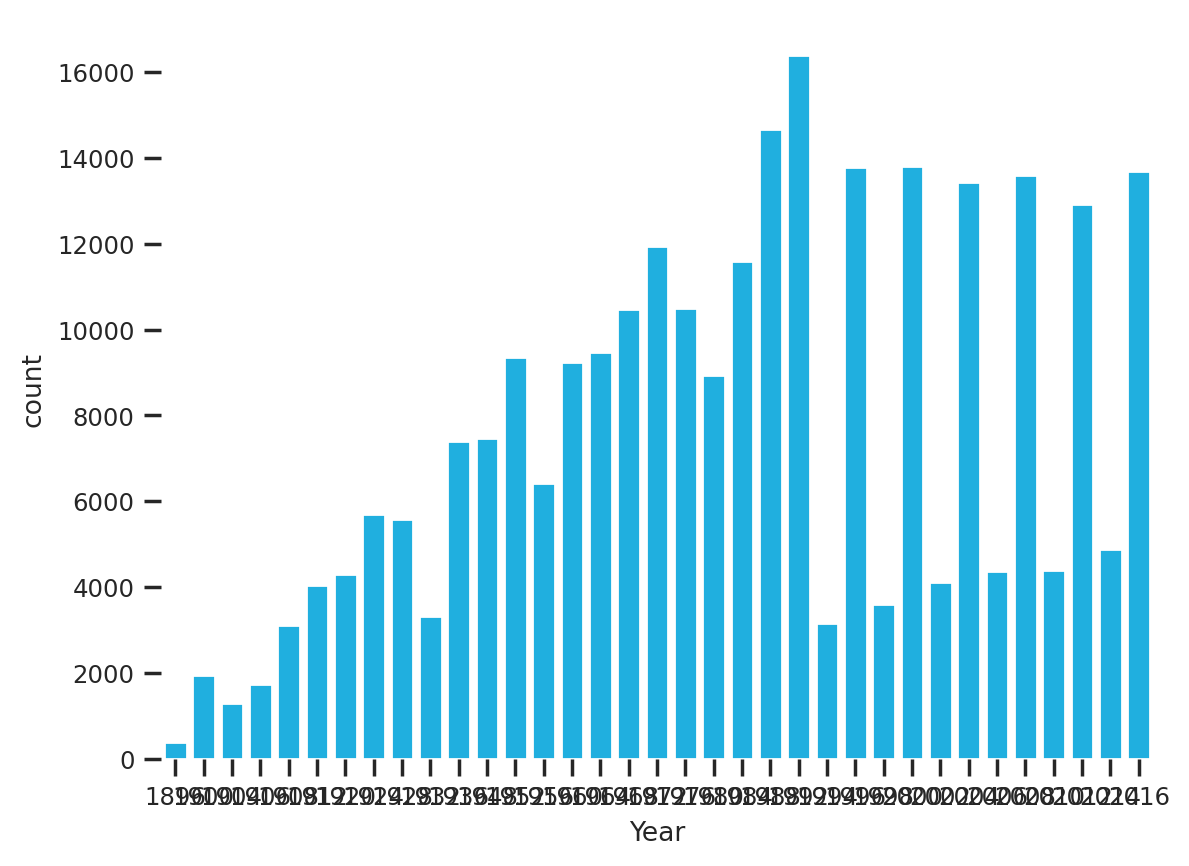

In [48]:
# Use Seaborn to plot a count of records per year
sns.countplot(df, x="Year");

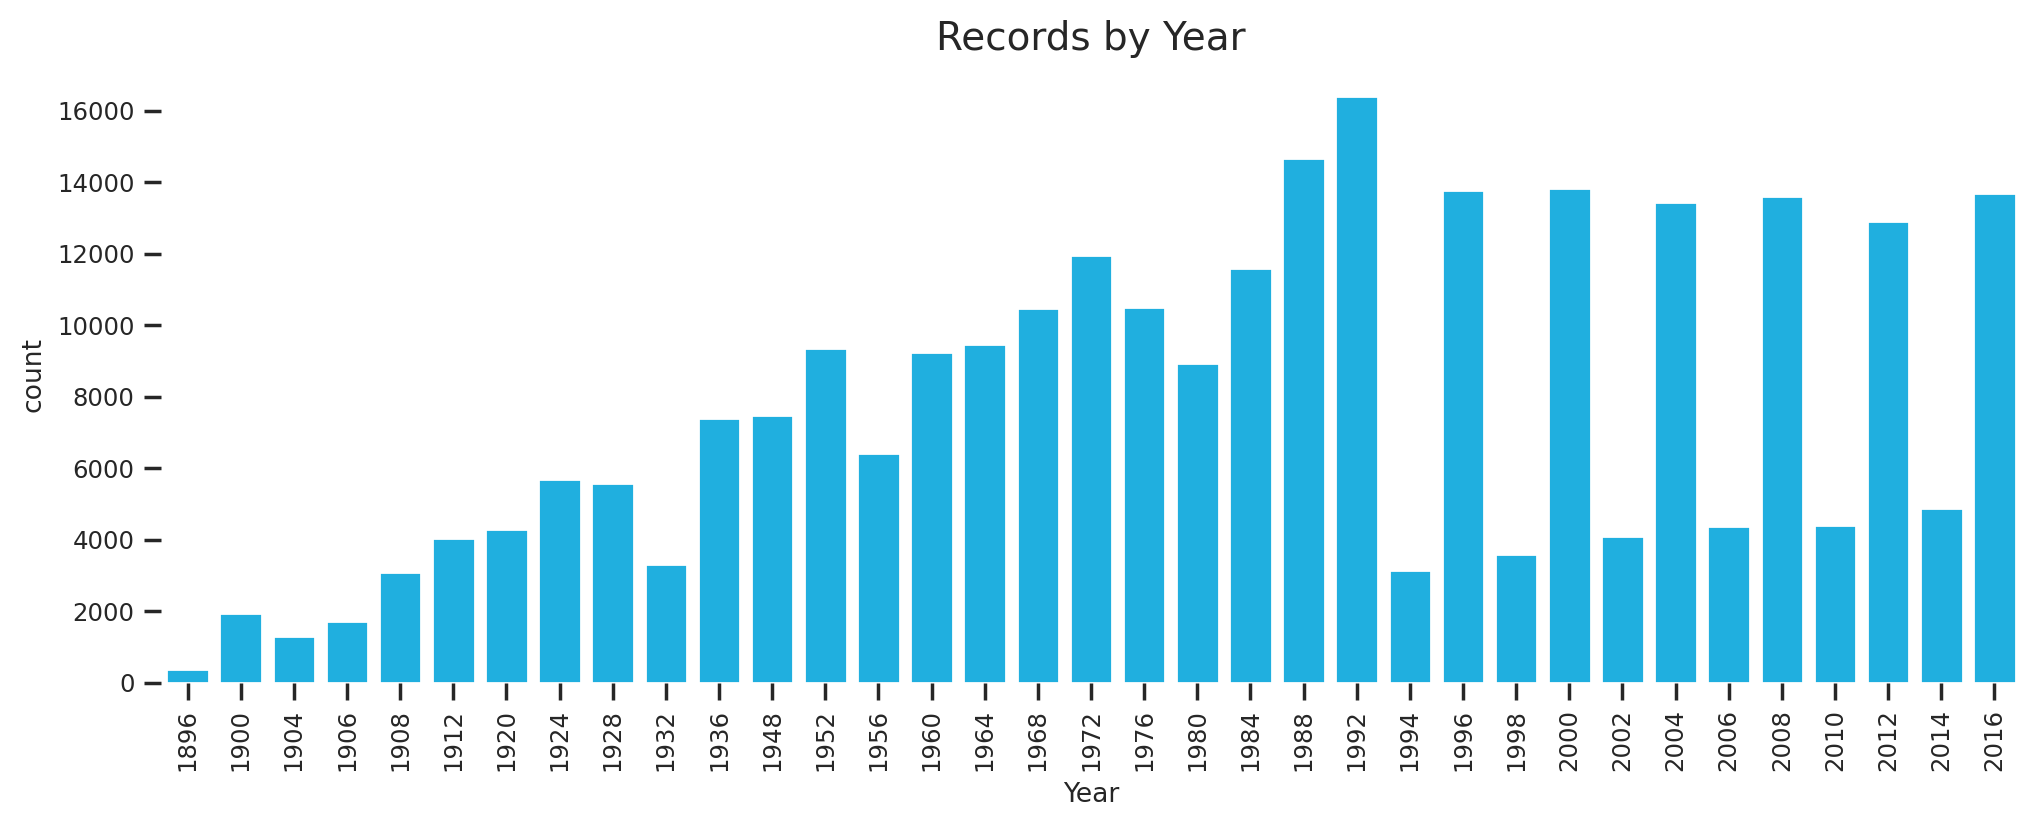

In [49]:
# Enhanced Countplot of records per year
# Adjust figure size, add a title, rotate the tick labels 90 degrees
plt.figure(figsize=(12,4))
plt.title("Records by Year", fontsize=14)
ax = sns.countplot(df, x="Year");
ax.tick_params(axis='x', rotation=90)

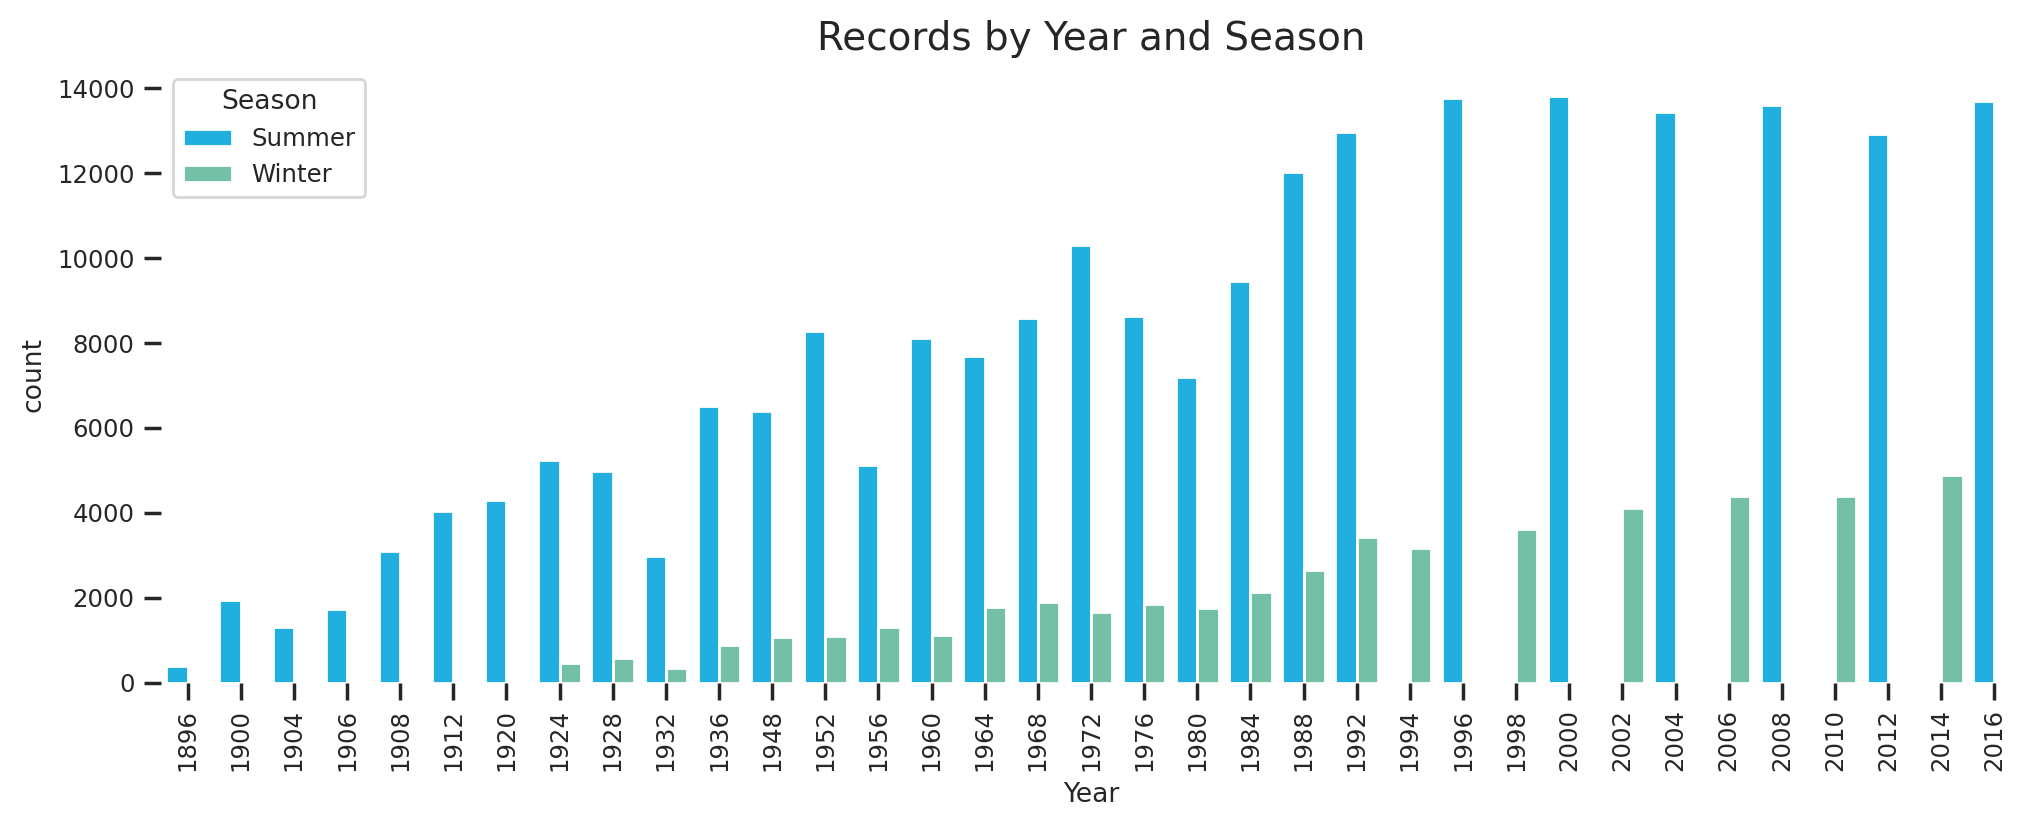

In [50]:
# Now color-code with separate bars for Season
plt.figure(figsize=(12,4))
plt.title("Records by Year and Season", fontsize=14)
ax = sns.countplot(df, x="Year", hue="Season");
ax.tick_params(axis='x', rotation=90)

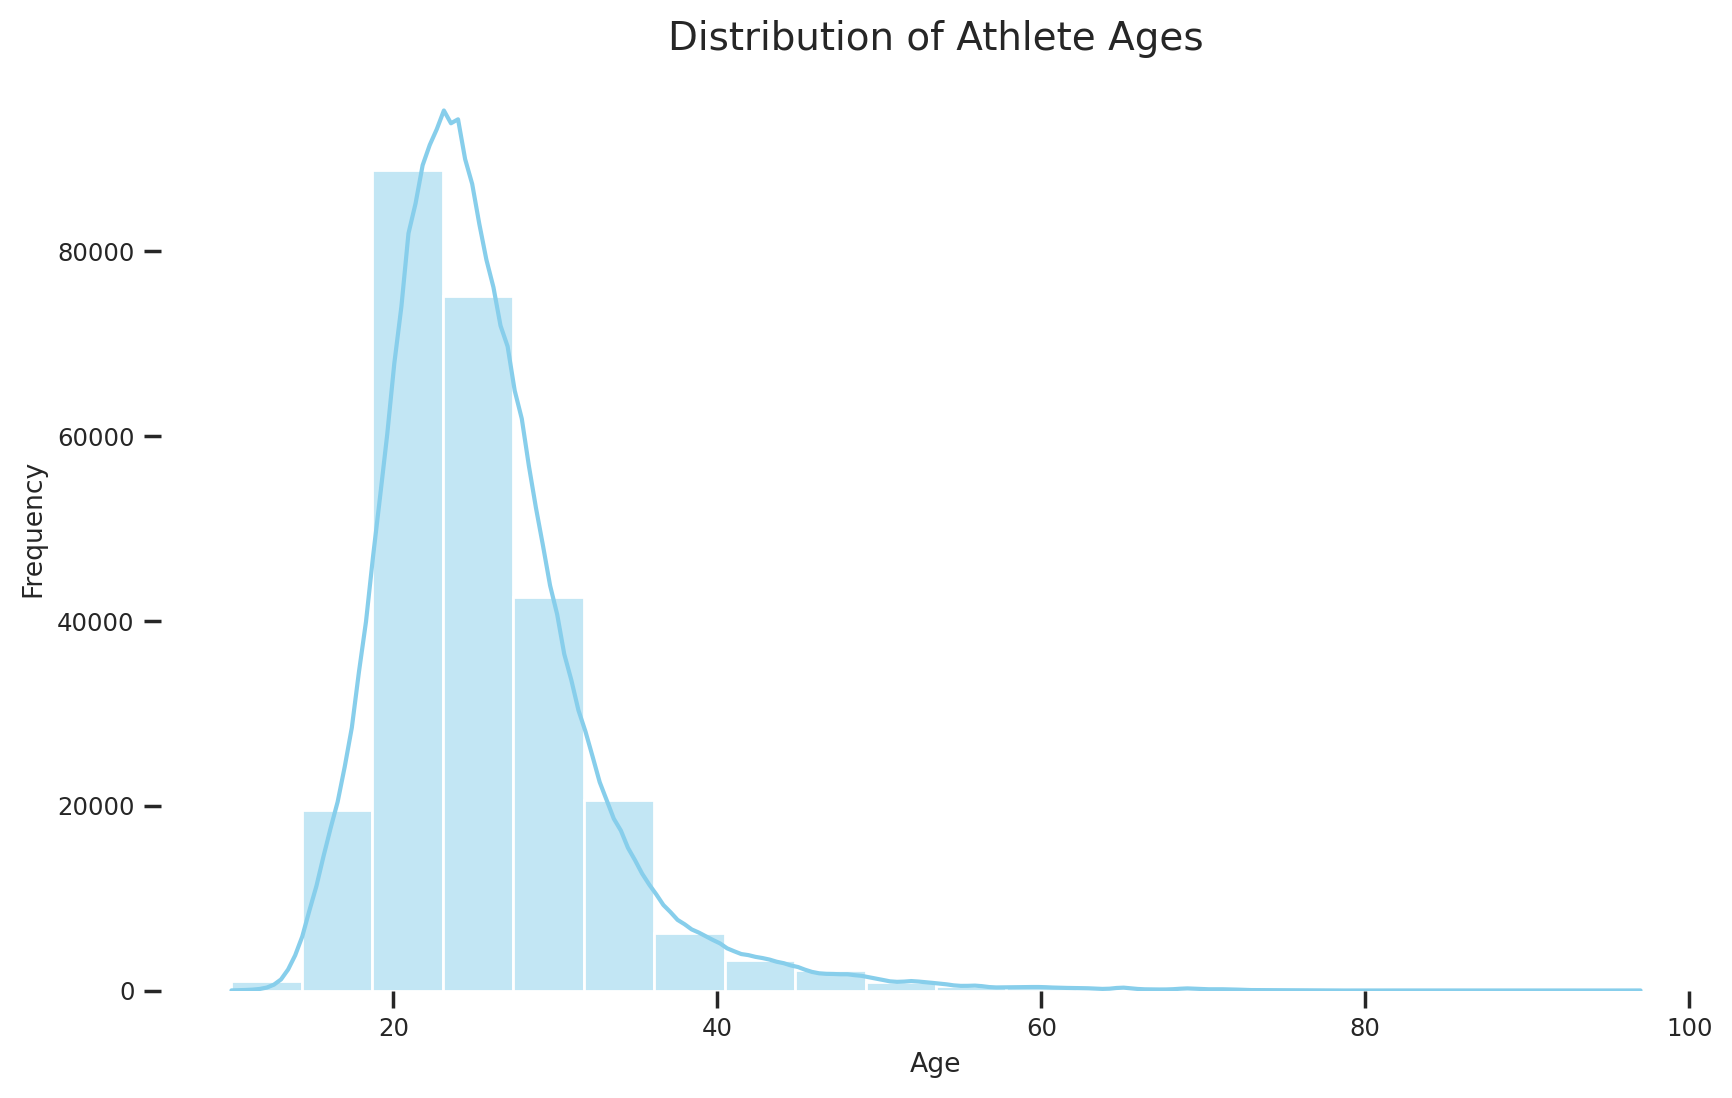

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribution of Athlete Ages', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-53-07b8e386cf45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Medal', order=['Gold', 'Silver', 'Bronze'], palette='Set2')


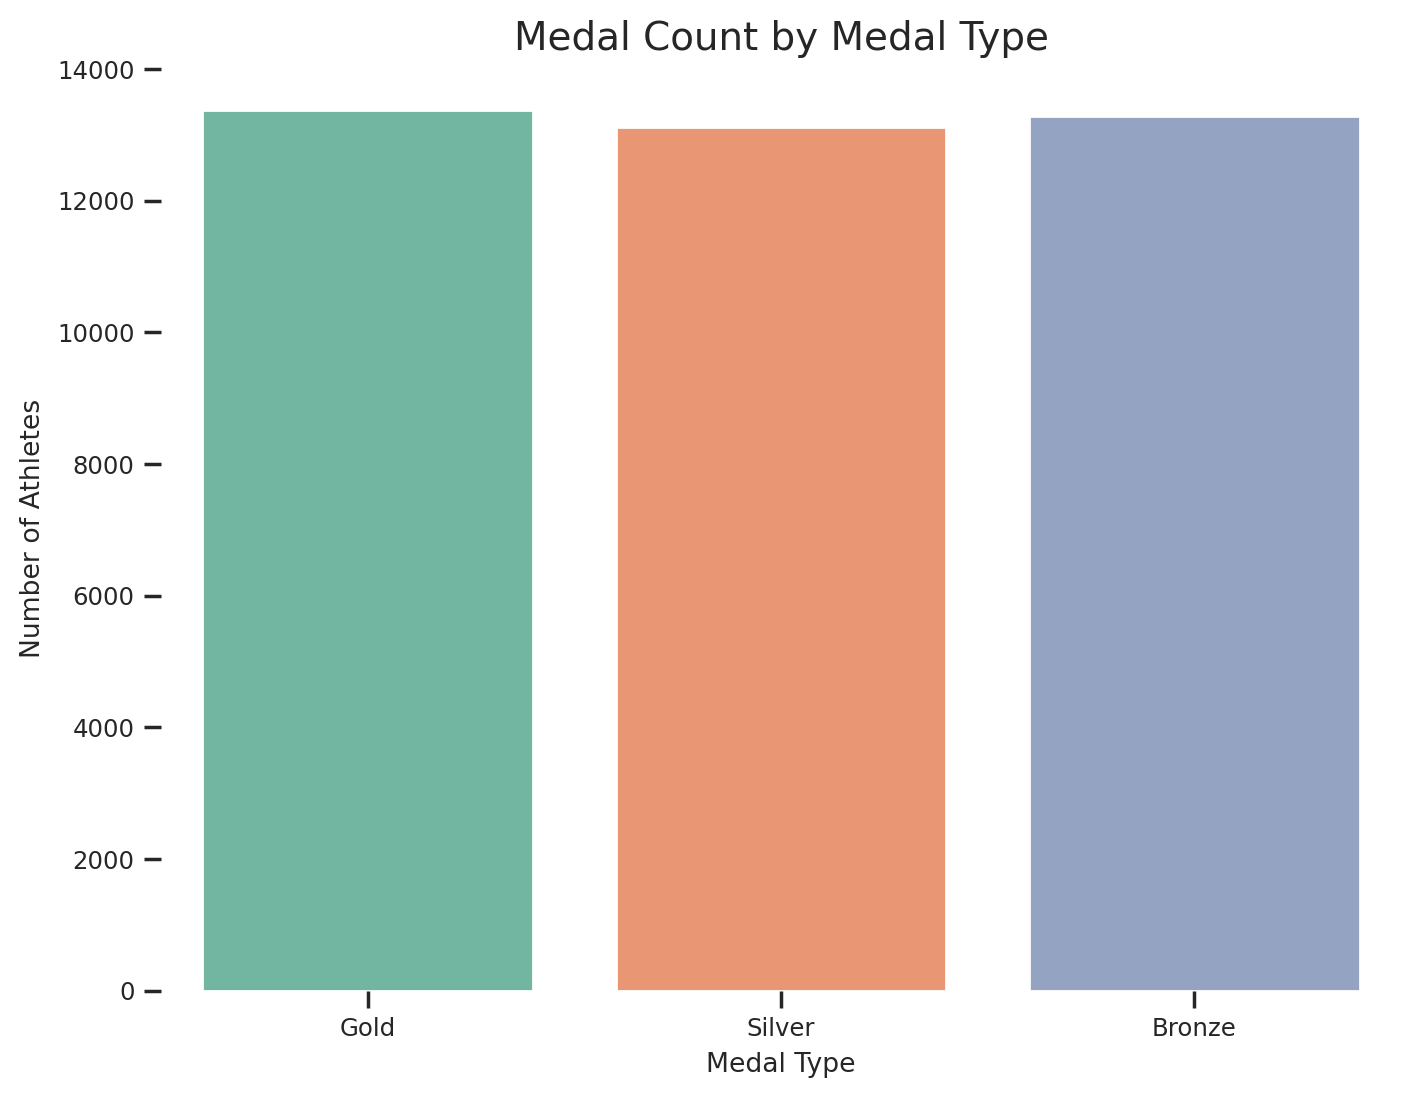

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Medal', order=['Gold', 'Silver', 'Bronze'], palette='Set2')
plt.title('Medal Count by Medal Type', fontsize=14)
plt.xlabel('Medal Type')
plt.ylabel('Number of Athletes')
plt.show()

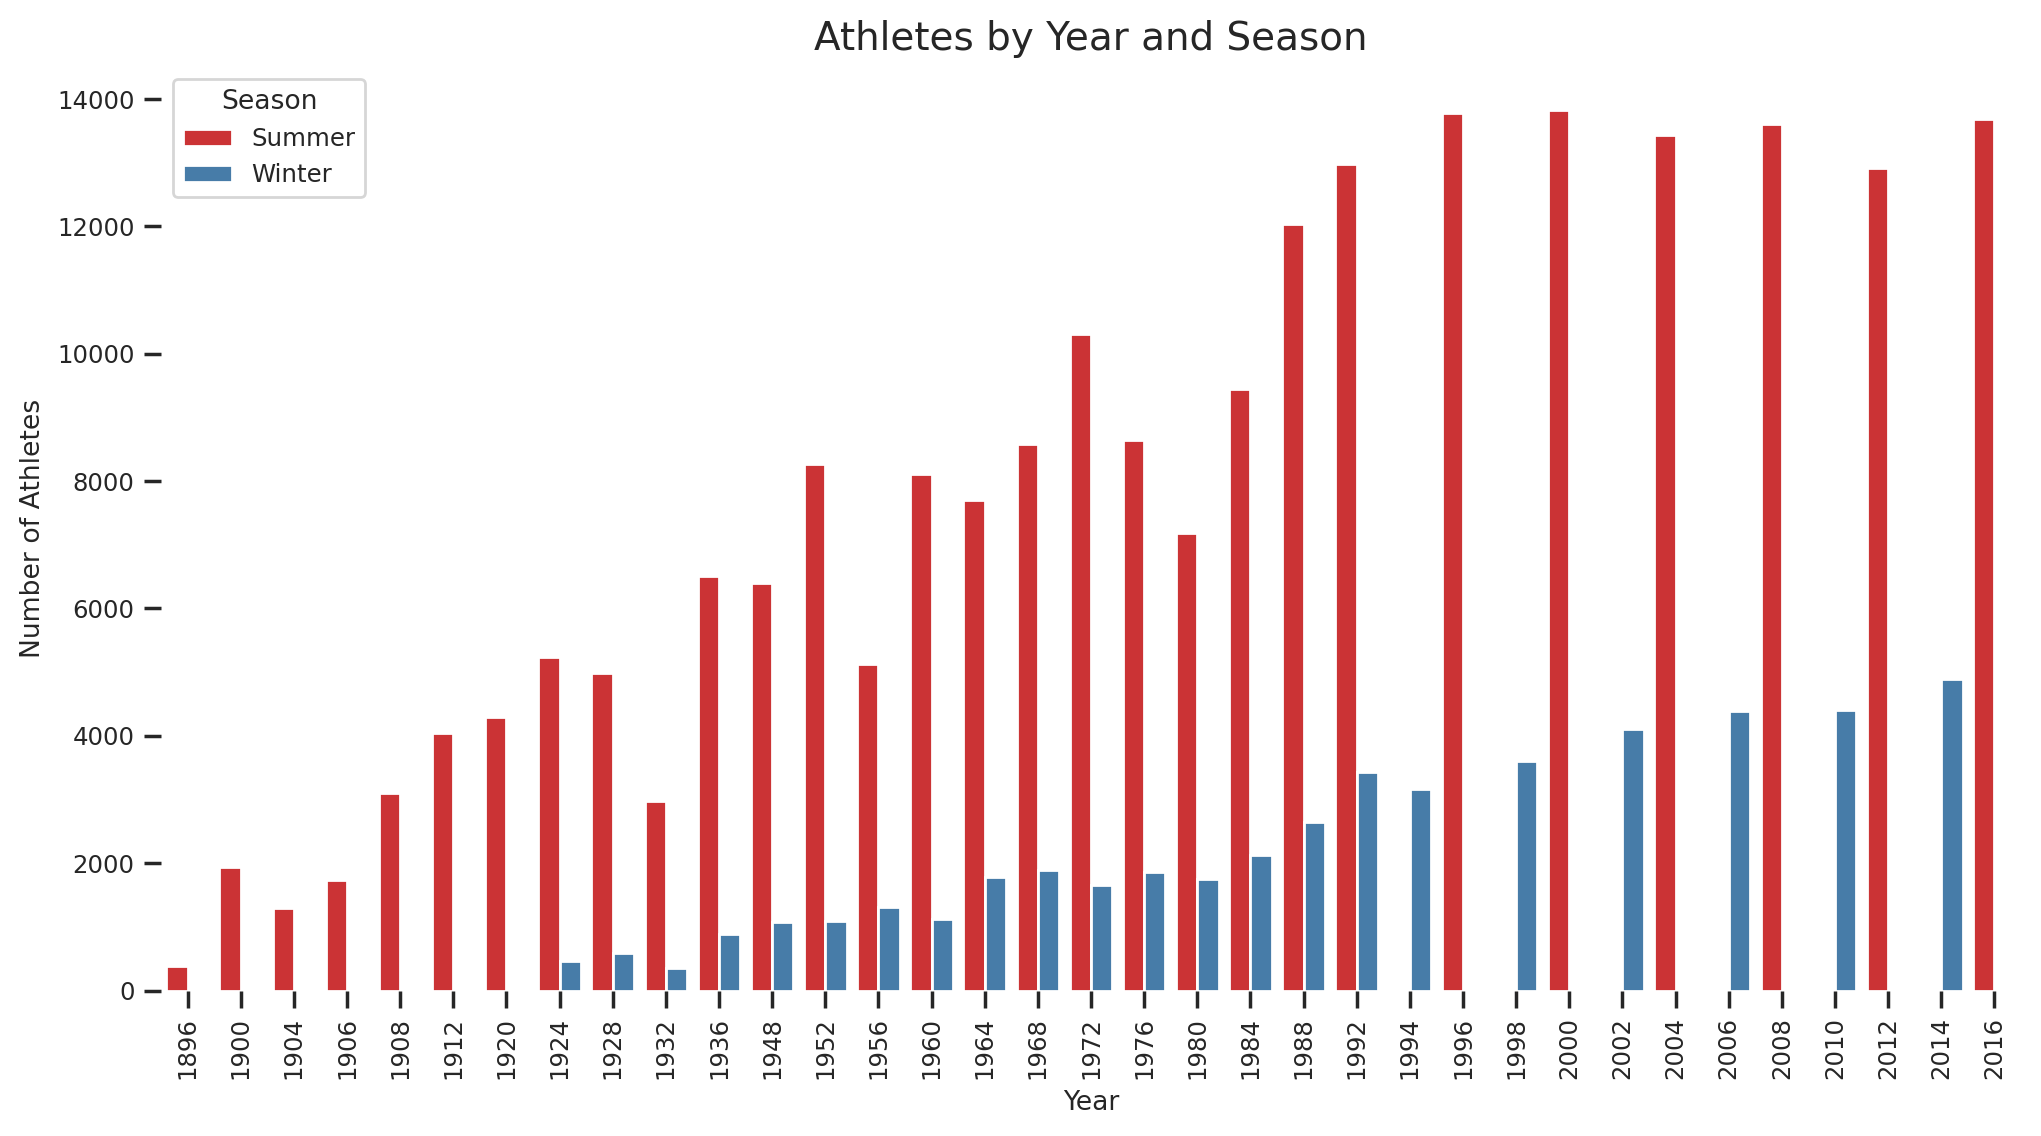

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', hue='Season', palette='Set1')
plt.title('Athletes by Year and Season', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=90)
plt.show()

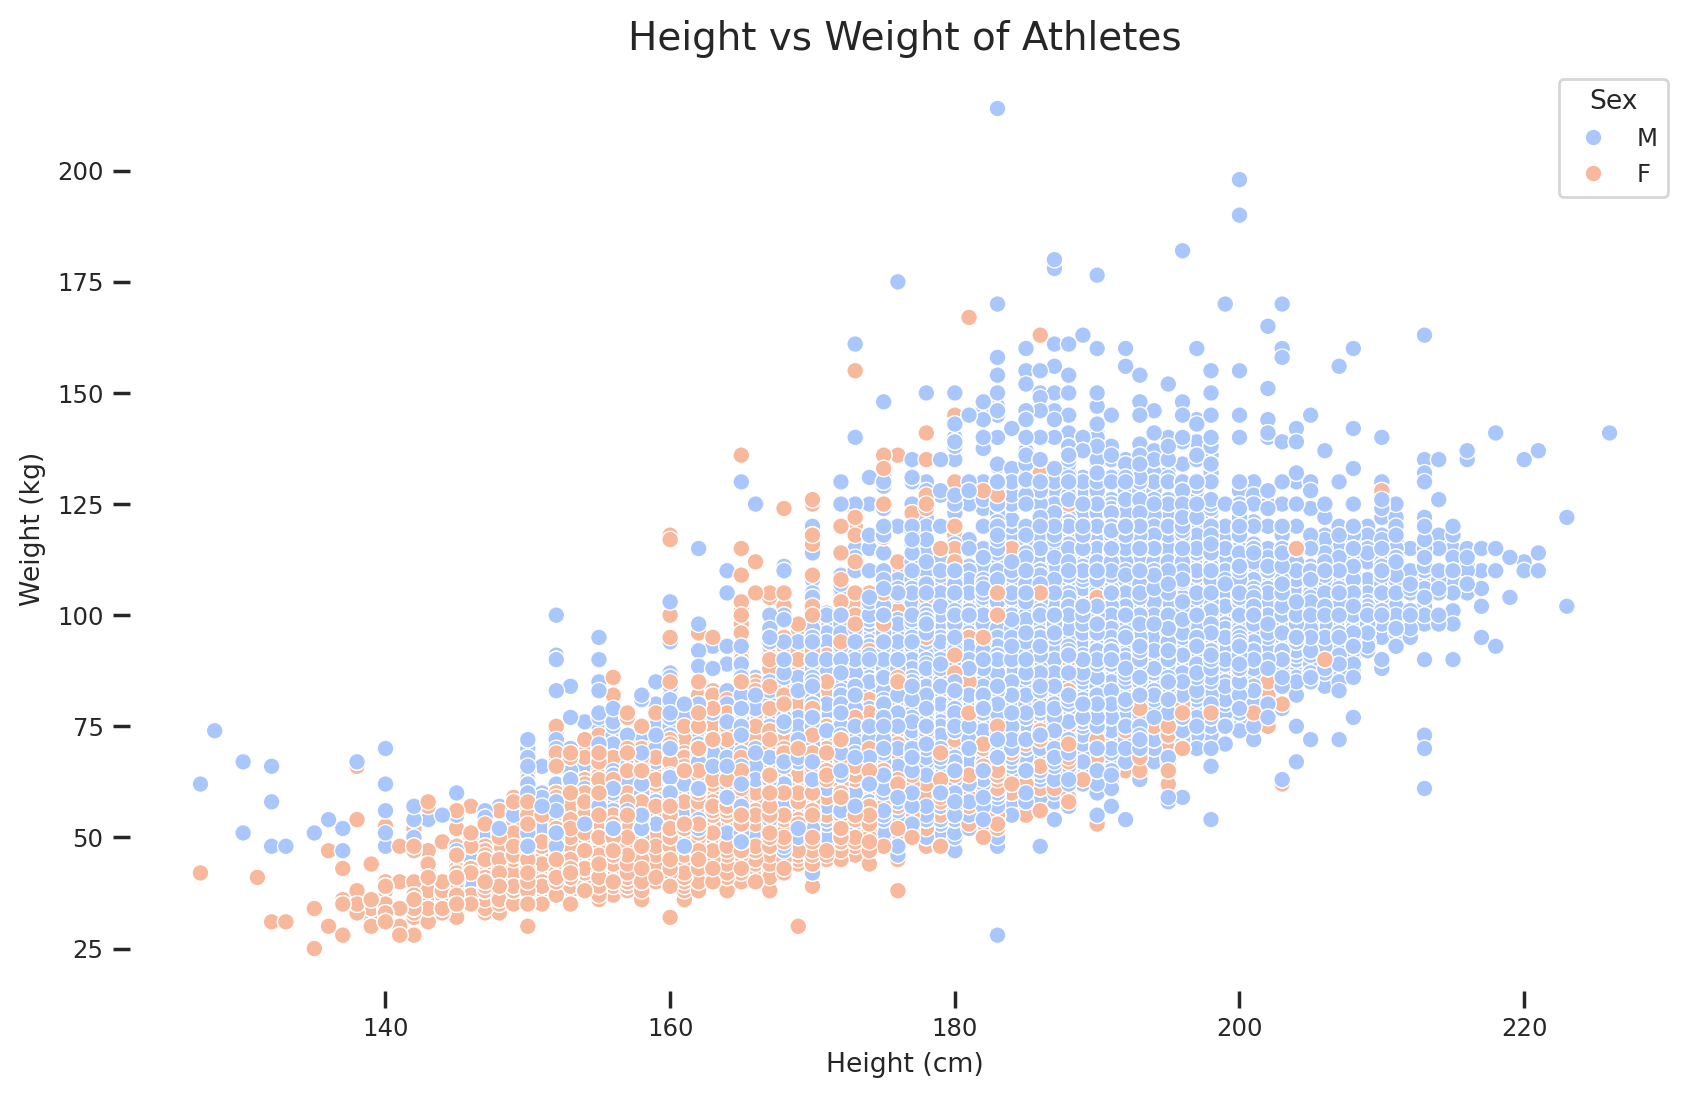

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Sex', palette='coolwarm')
plt.title('Height vs Weight of Athletes', fontsize=14)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


<ipython-input-58-ba2539080f44>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.index, y=top_sports.values, palette='Set3')


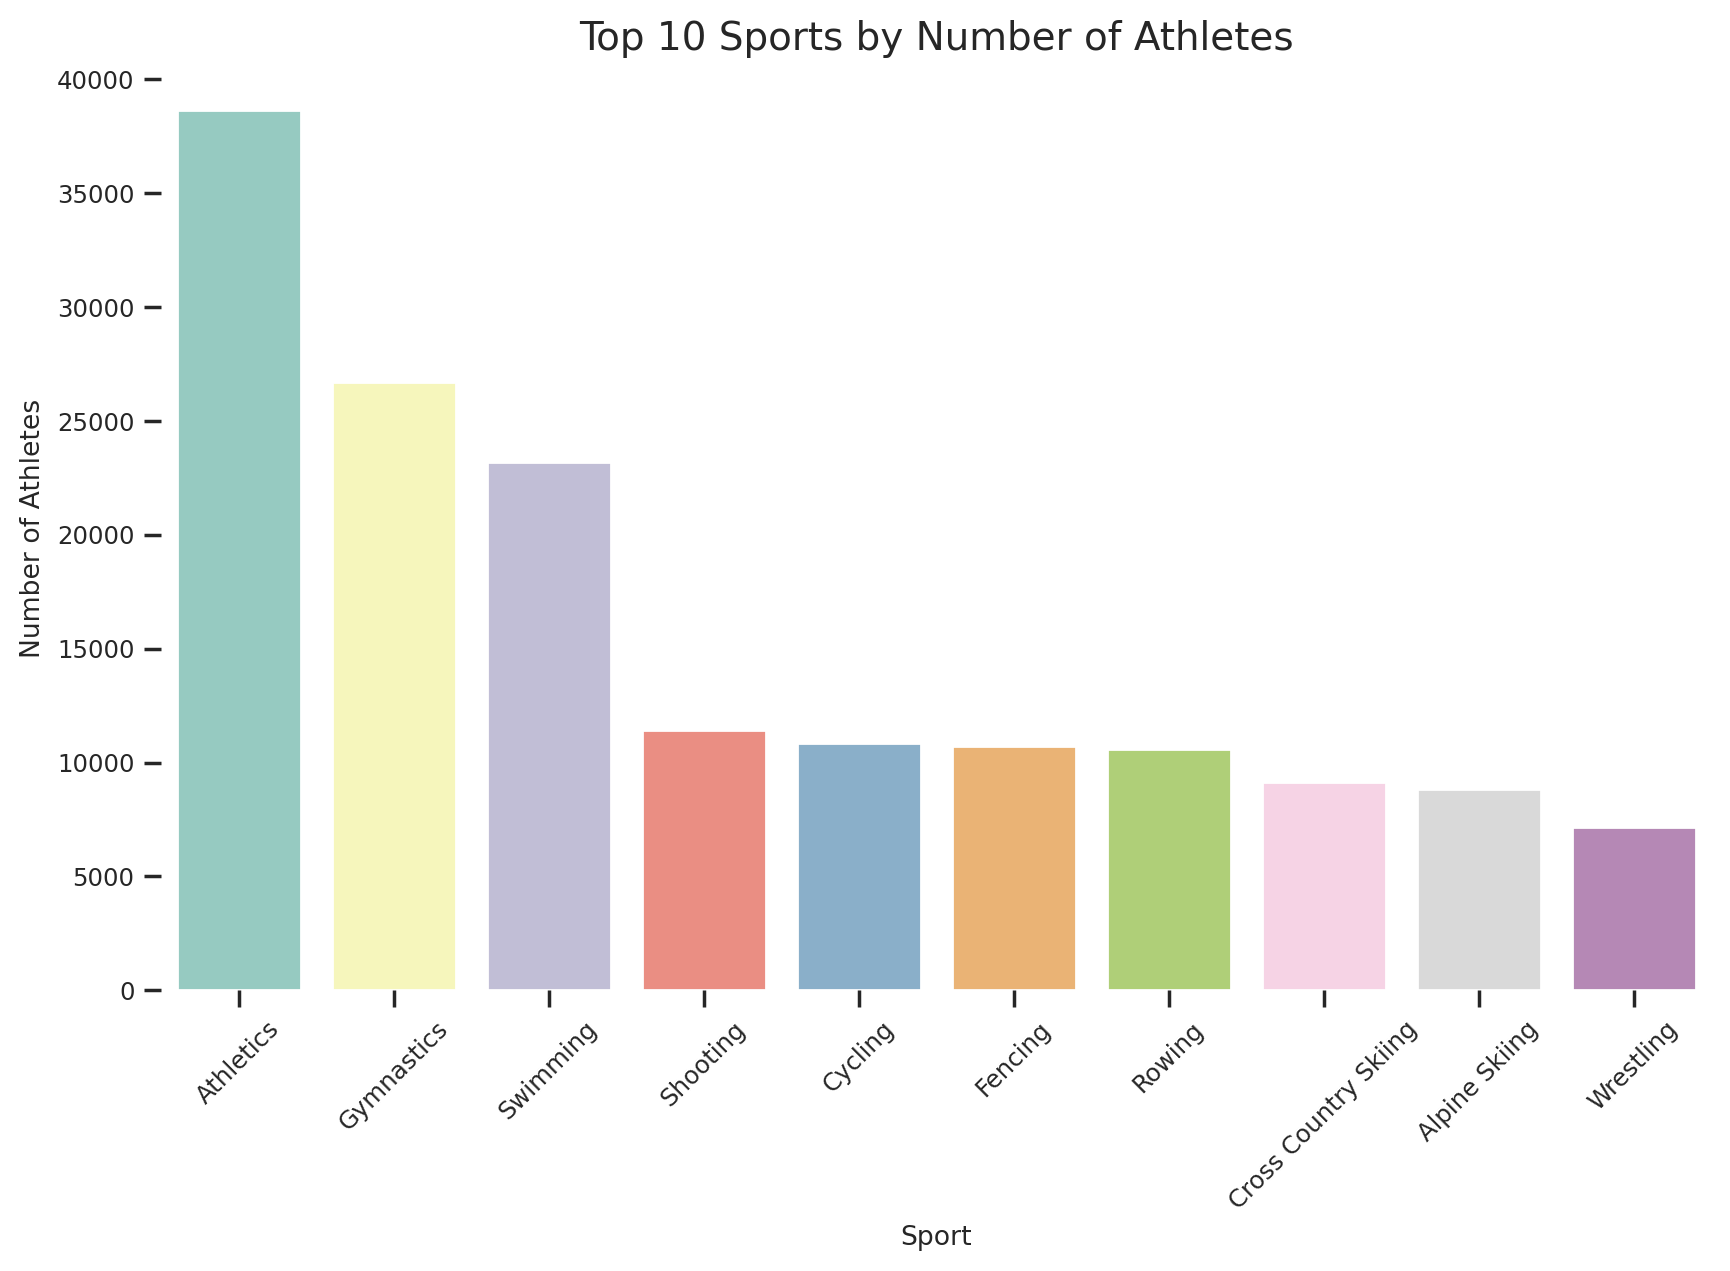

In [58]:
top_sports = df['Sport'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_sports.index, y=top_sports.values, palette='Set3')
plt.title('Top 10 Sports by Number of Athletes', fontsize=14)
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.show()


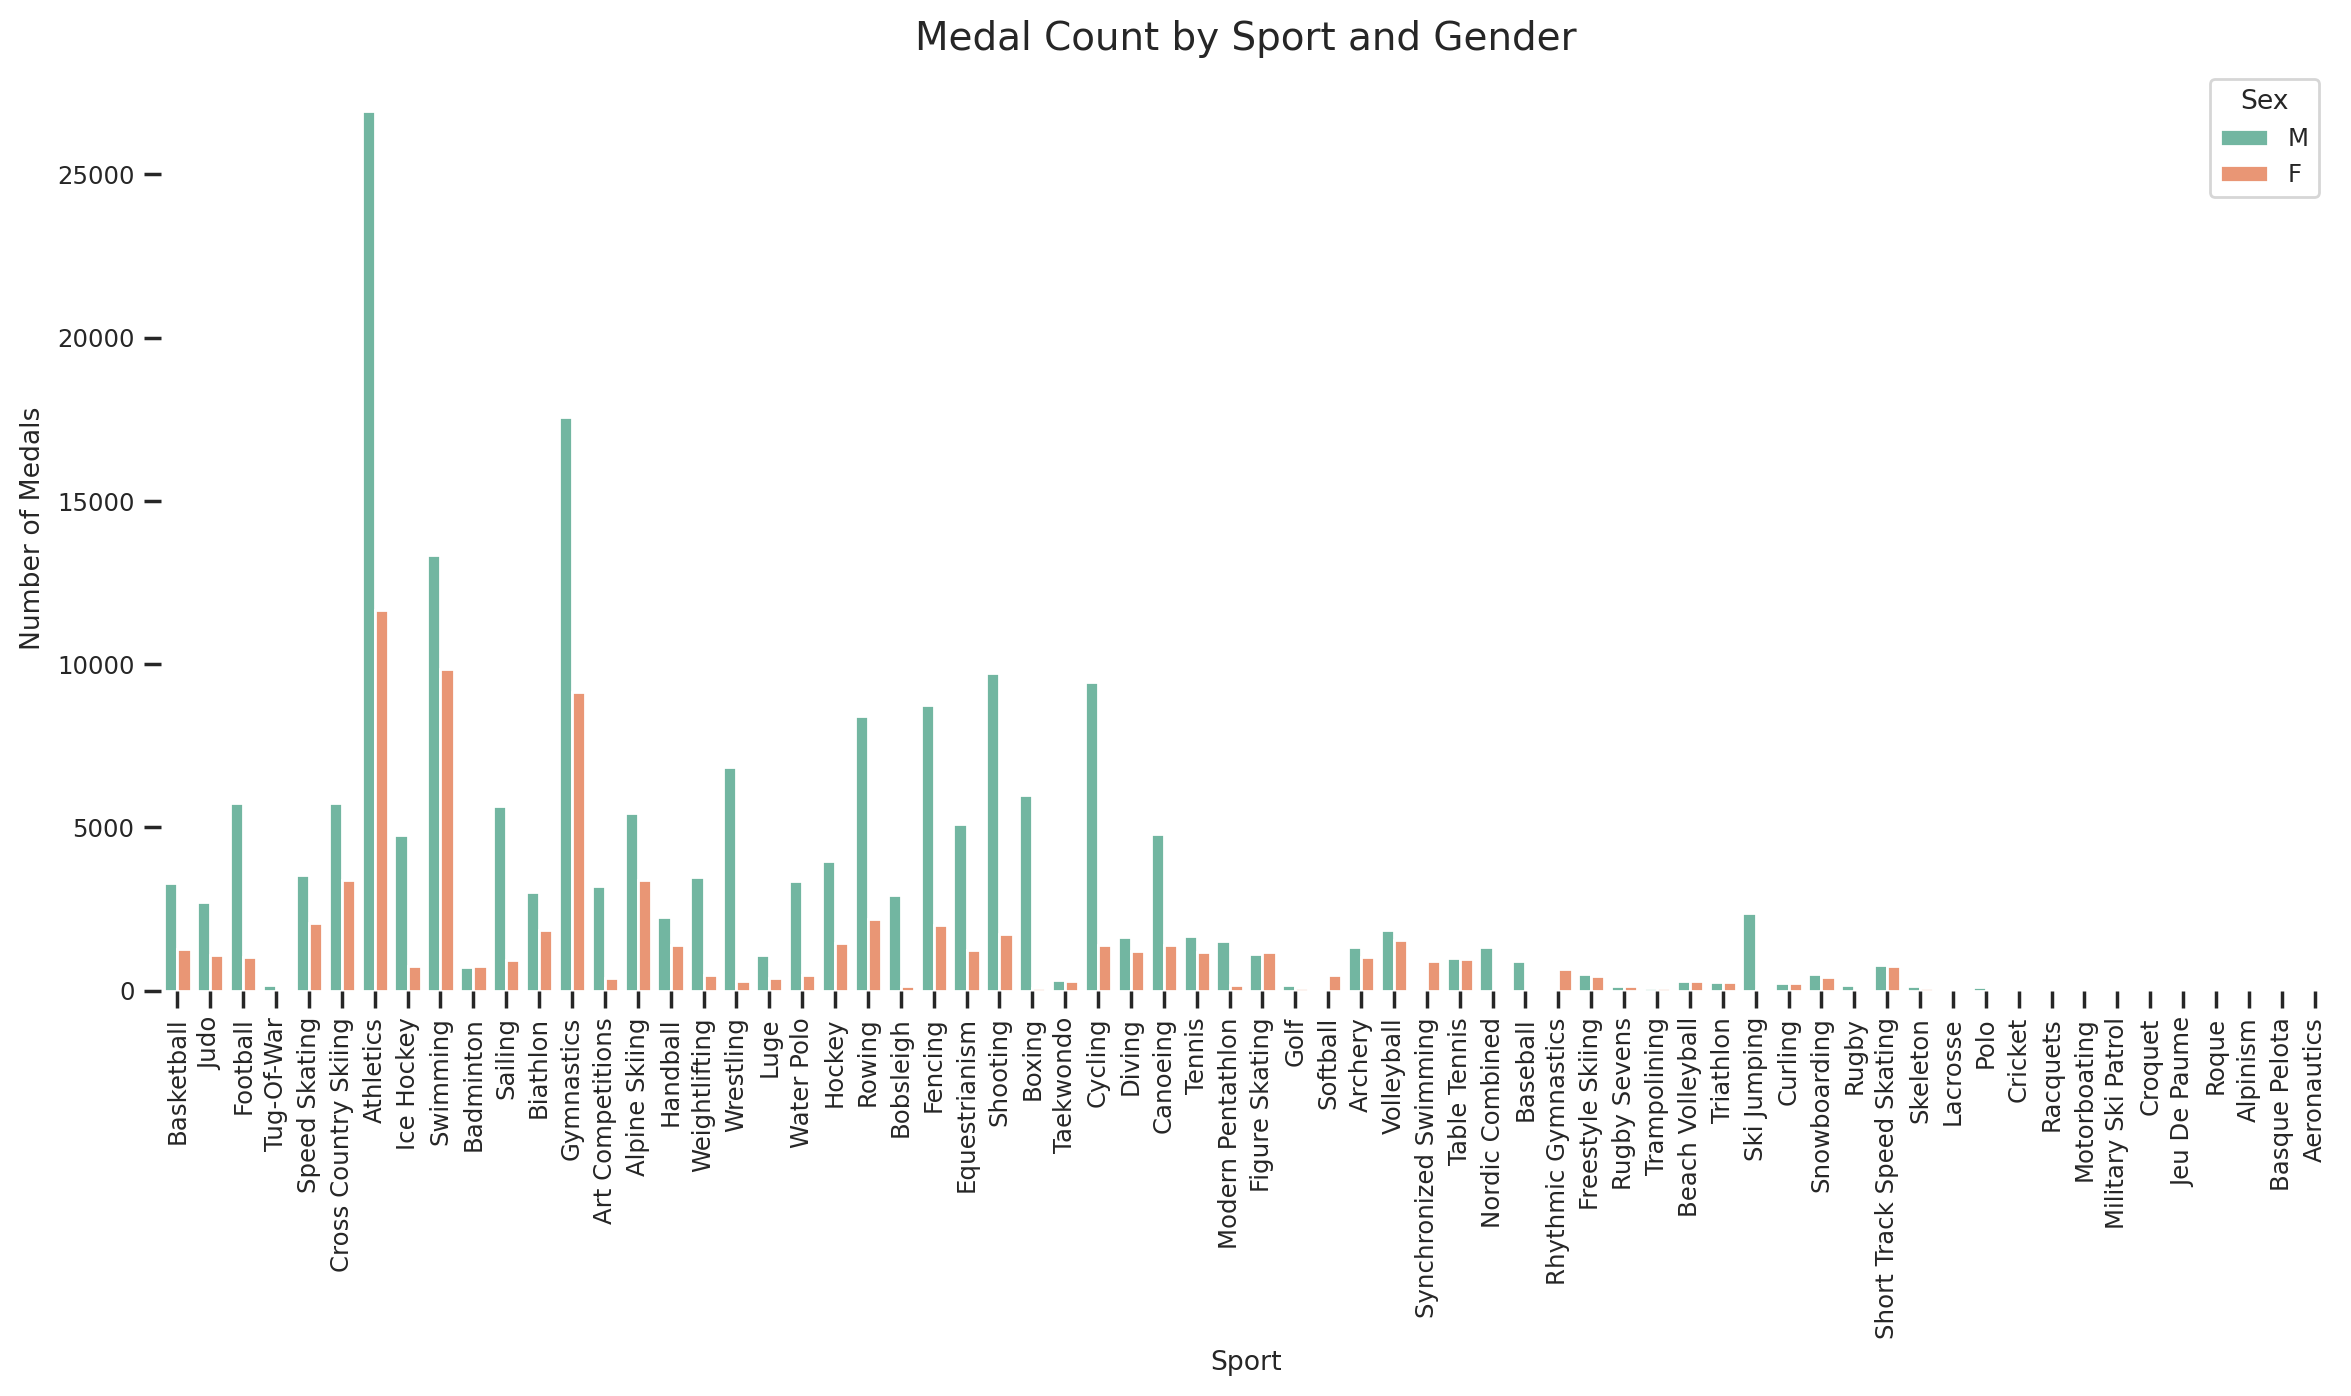

In [59]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Sport', hue='Sex', palette='Set2')
plt.title('Medal Count by Sport and Gender', fontsize=14)
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()


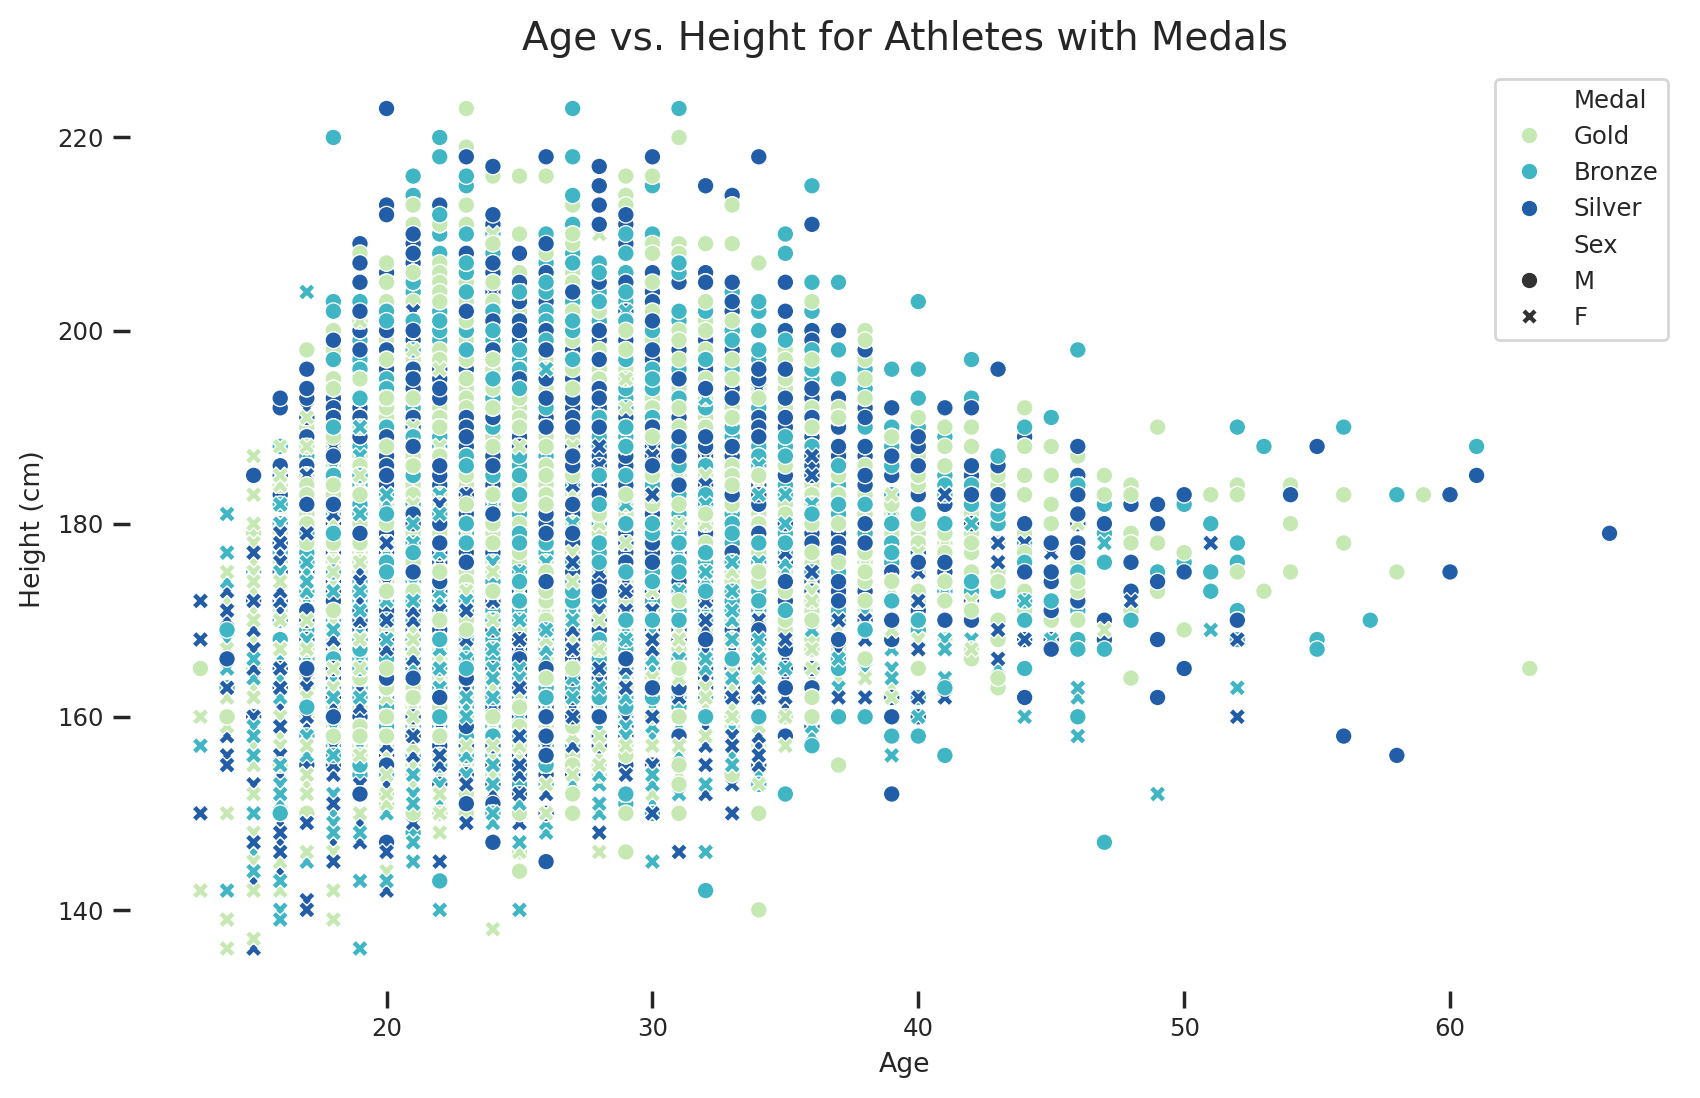

In [62]:
medalists = df[df['Medal'].notnull()]

plt.figure(figsize=(10,6))
sns.scatterplot(data=medalists, x='Age', y='Height', hue='Medal', palette='YlGnBu', style='Sex')
plt.title('Age vs. Height for Athletes with Medals', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.show()


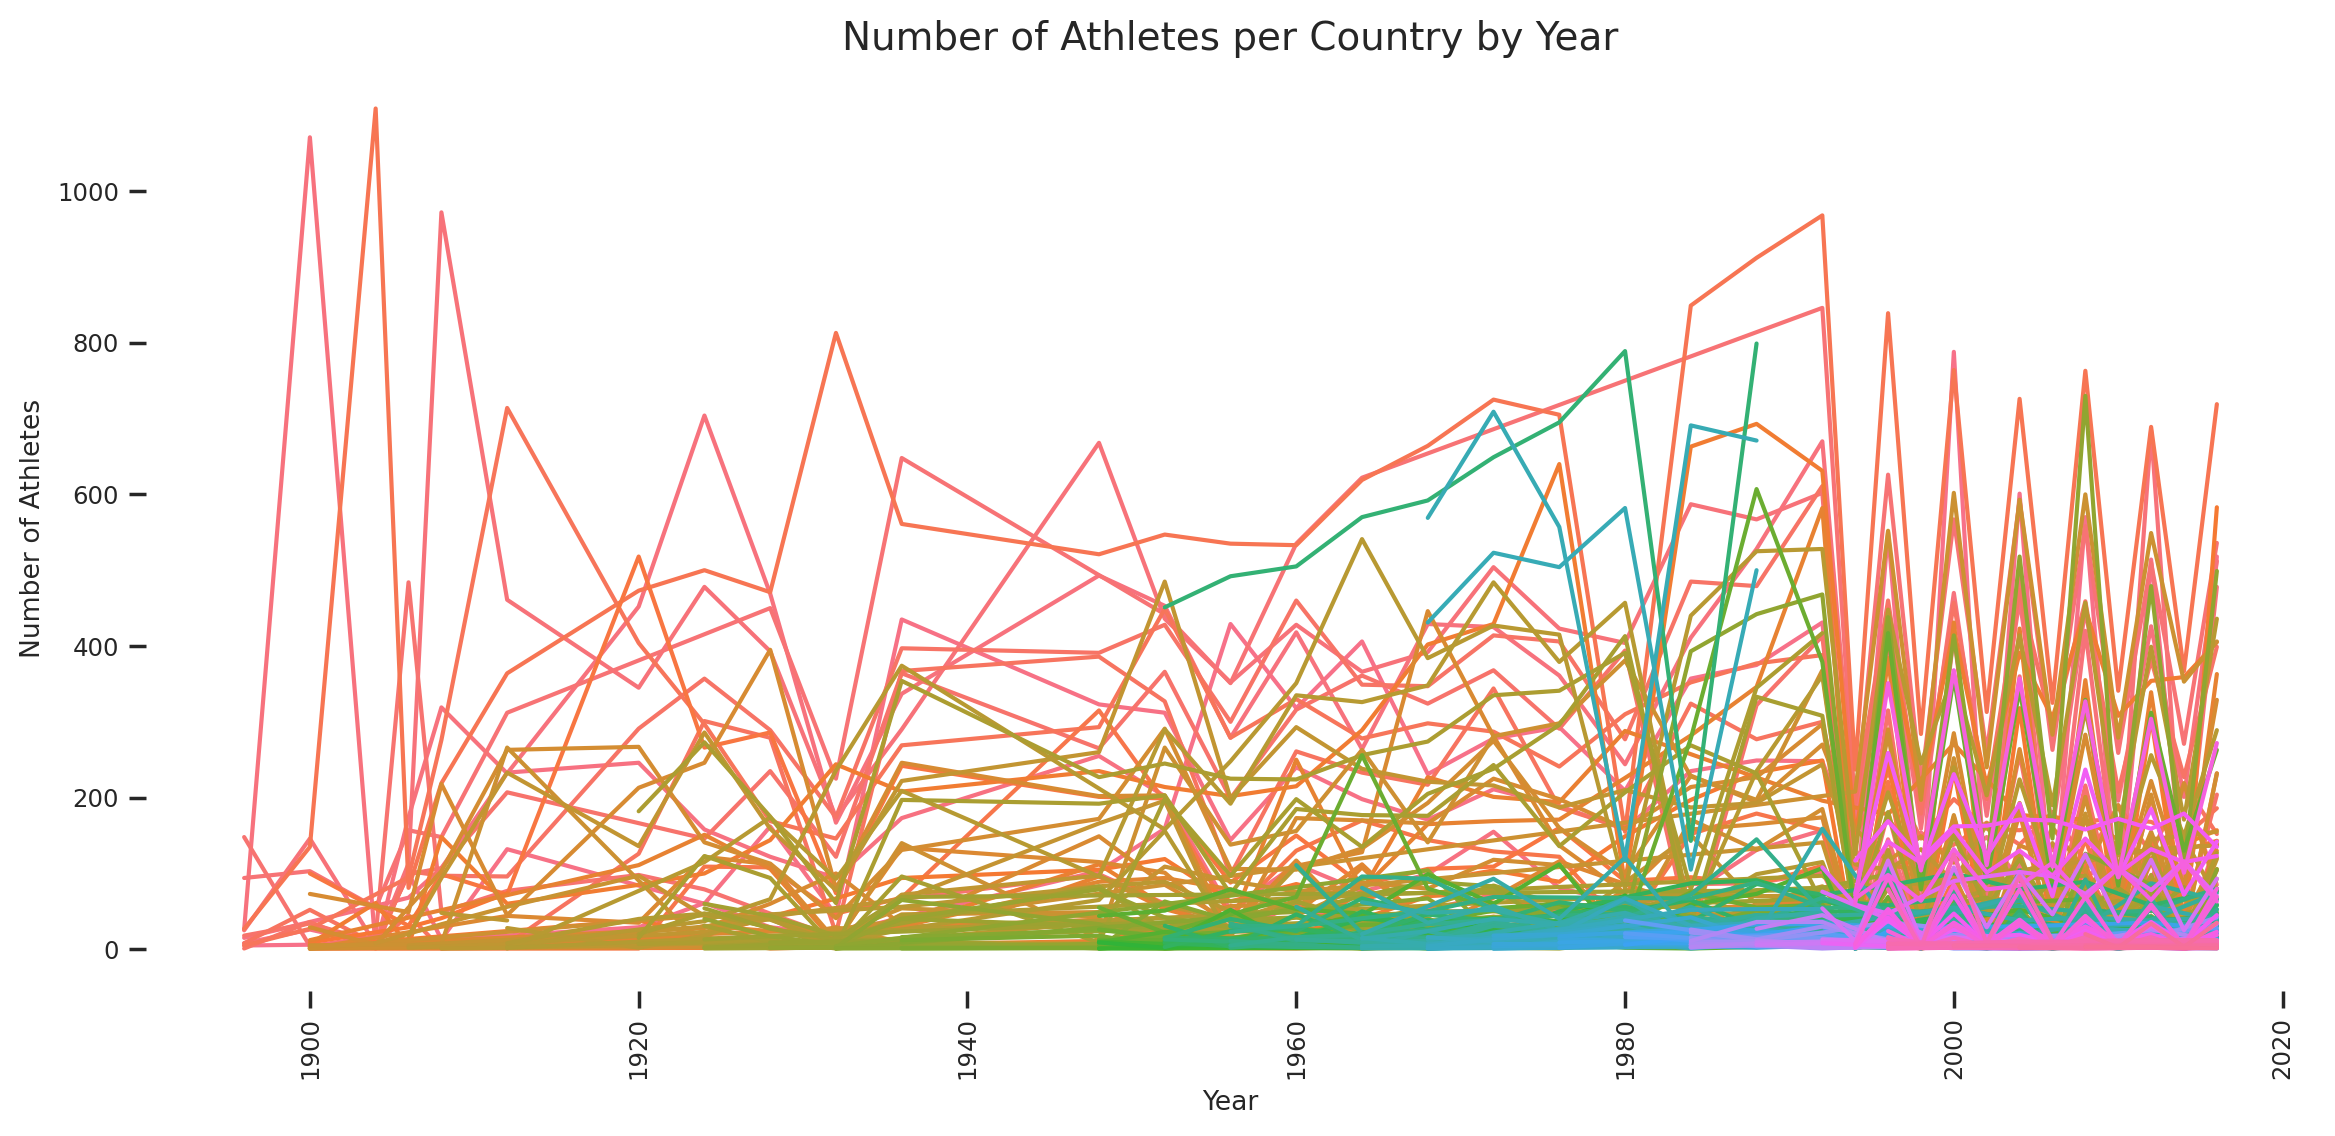

In [63]:
athletes_by_country = df.groupby(['Year', 'NOC']).size().reset_index(name='Athletes')
plt.figure(figsize=(14,6))
sns.lineplot(data=athletes_by_country, x='Year', y='Athletes', hue='NOC', legend=None)
plt.title('Number of Athletes per Country by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=90)
plt.show()


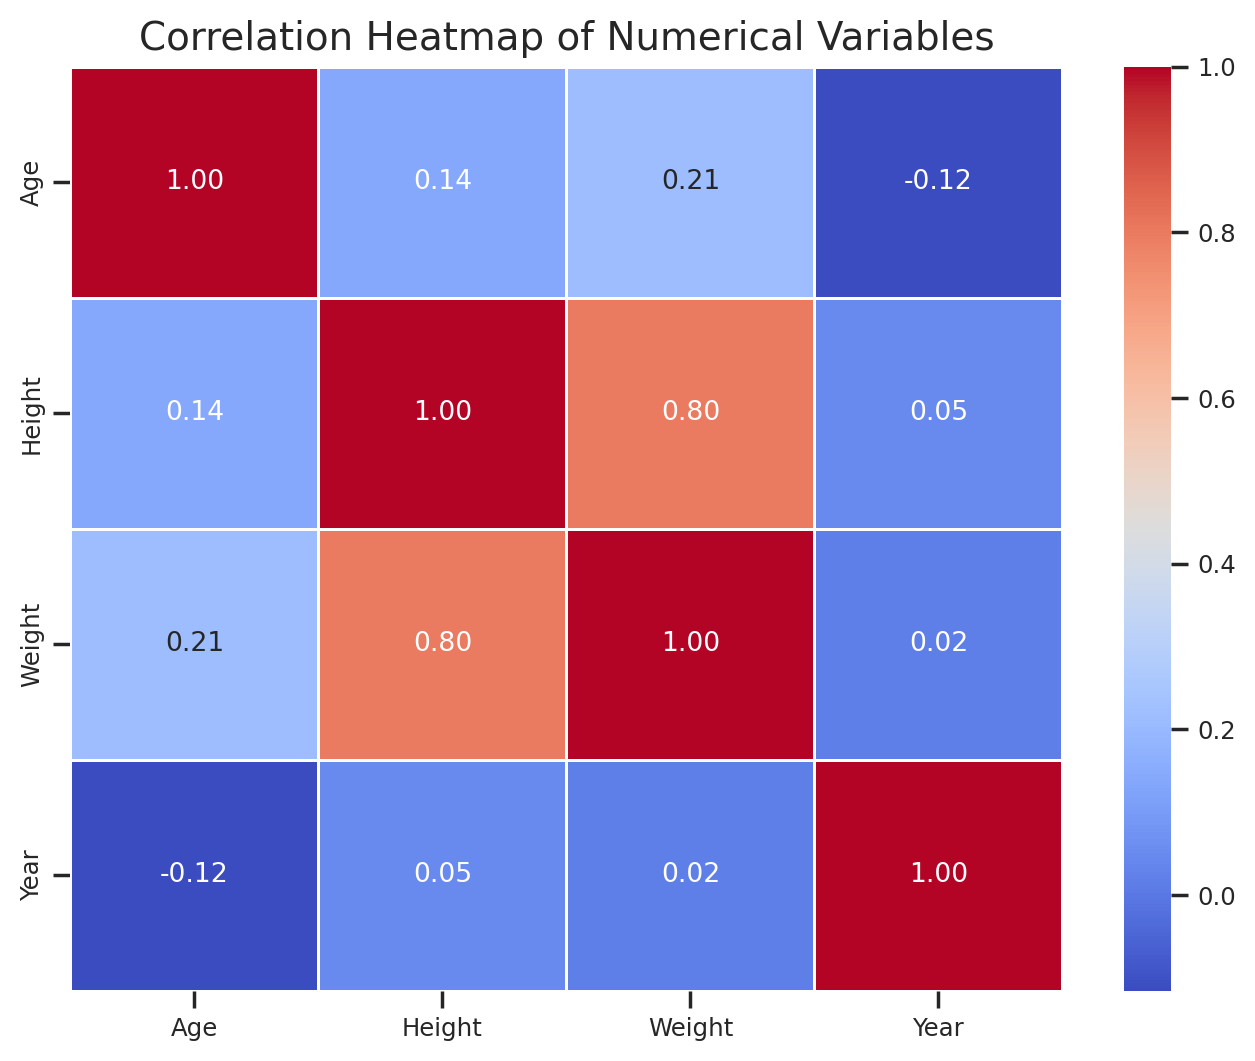

In [64]:
correlation_matrix = df[['Age', 'Height', 'Weight', 'Year']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14)
plt.show()
